In [1]:
from scenario_class import Scenario
from plots_class import Plots

scenario_params = {"end_year": 2100,
                   "income_goal": 20000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 500, # in terms of GtCO2 that is gigatons of CO2        
                   "gdp_assumption": "constant_ratio" #this is a string and either either constant_ratio or model_ratio for details see the scenario_class.py file         
            }

scenario_1 = Scenario(scenario_params)
scenario_1.compute_country_scenario_params()
scenario_1.run()


### Plot global quantities as a first check

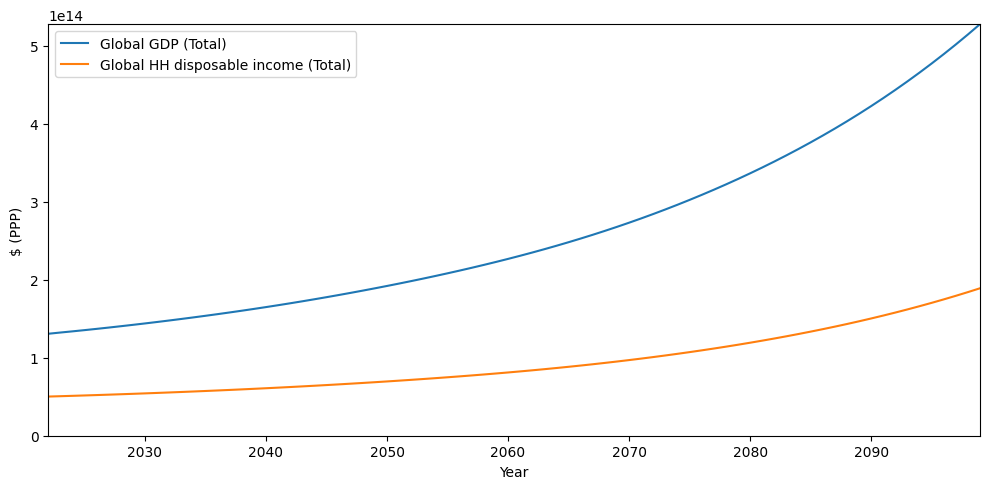

this is time to deplete 31.368008379025998


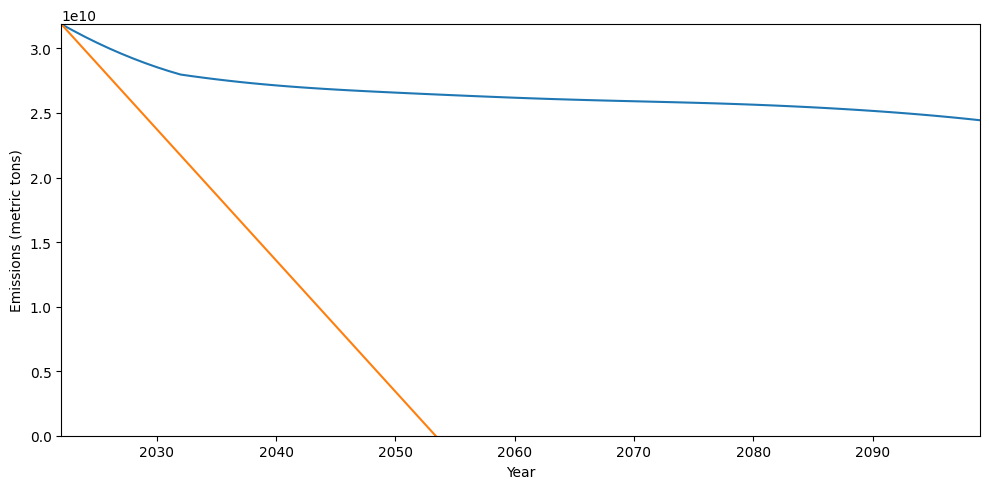

In [2]:
plotting_1 = Plots(scenario_1) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_1.plot_global_economy()
plotting_1.plot_global_emissions()

### Plot example country, here the United States

[2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099]
[1085.8198669490462, 1119.6178824815843, 1154.647371171111, 1190.9593055909875, 1228.6069760562923, 1267.6461035471627, 1308.1349584339775, 1350.1344853155292, 1393.7084342986138, 1438.9234990657571, 1485.8494620971248, 1534.5593474331024, 1585.1295813856443, 1637.640161629365, 1692.1748351275091, 1748.8212853735215, 1807.6713294559959, 1868.82112548339, 1932.3713909351943, 1998.4276325382586, 2067.1003883009007, 2138.5054823732876, 2212.764293440544, 2290.004037395226, 2370.358065078334, 2453.9661759230416, 2540.974948382987

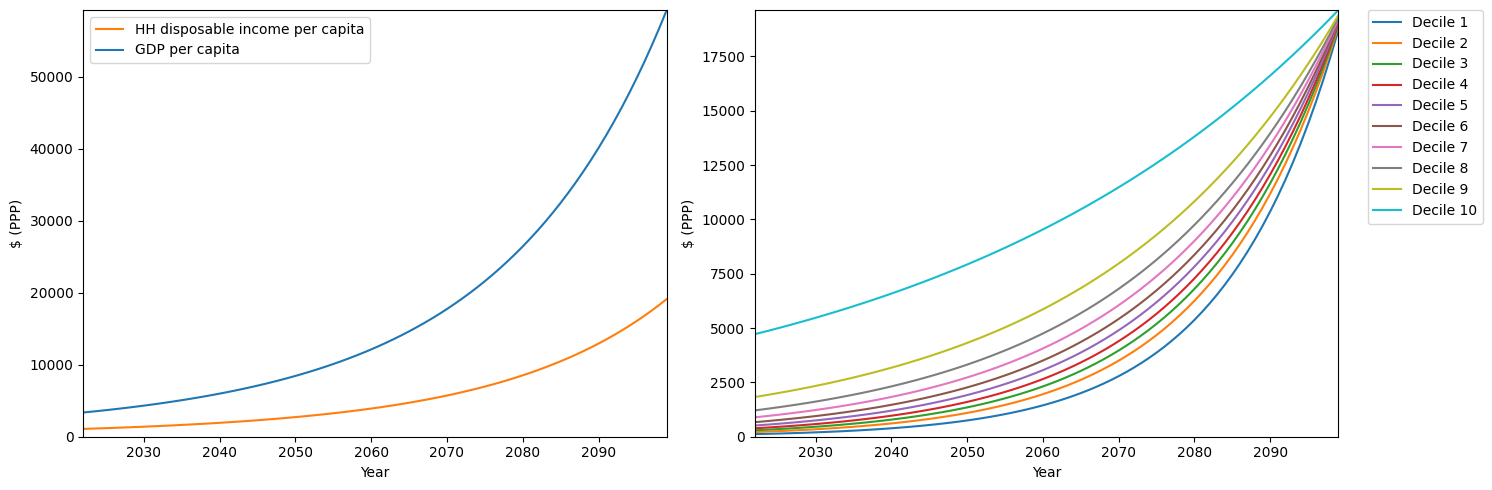

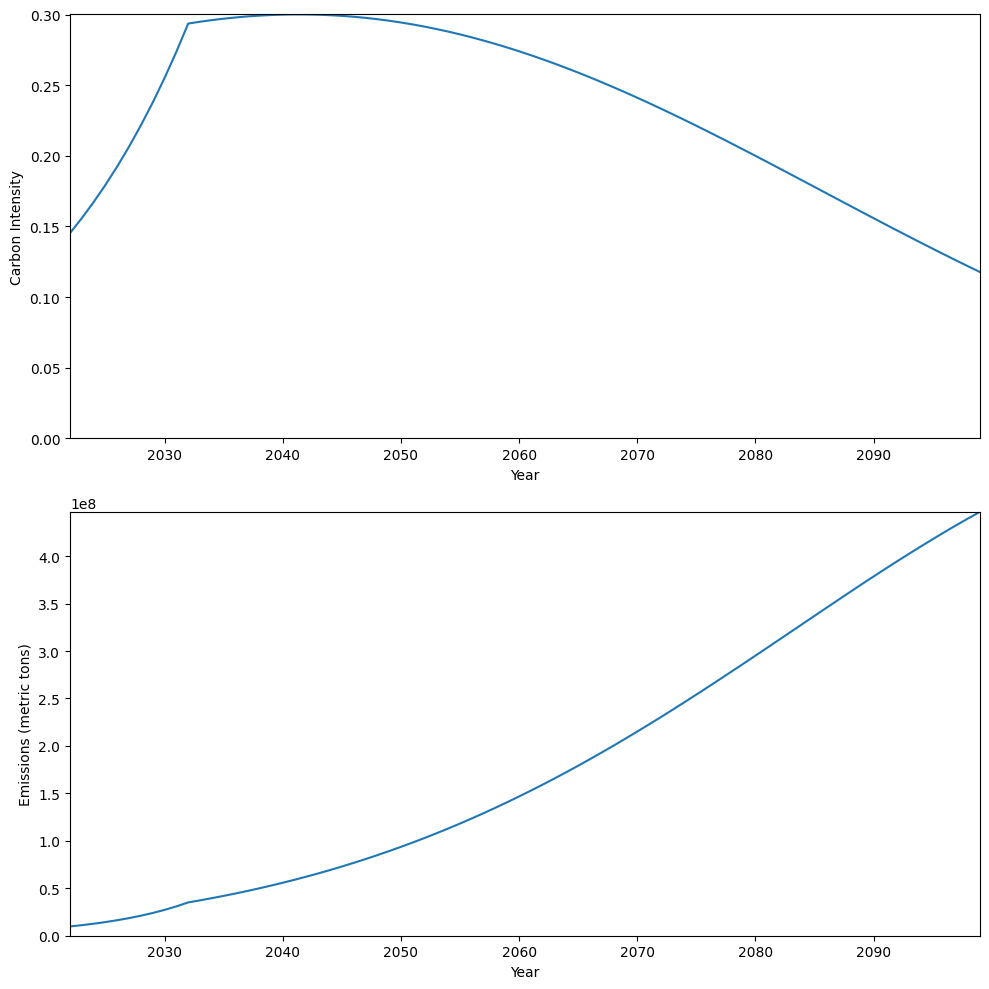

In [3]:
plotting_1.plot_country_economy("Zambia")
plotting_1.plot_country_emissions("Zambia")